In [1]:
import pandas as pd
import numpy as np
import itertools
from scipy.stats import fisher_exact
import shelve
import pickle
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from PIL import Image
from scipy.interpolate import BSpline, make_interp_spline, interp1d
import csv
from dfply import *
import itertools
import os
import logging
from sys import getsizeof
import sklearn
import time
from sklearn.metrics import roc_auc_score
from catboost import Pool, cv
import xgboost
import catboost
import scipy.stats as st

import importlib
from joblib import Parallel, delayed
from joblib import parallel_backend

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
#from statsmodels.tsa.vector_ar.var_model import VARY
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests, pacf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings("ignore")
import scipy
import datetime

from joblib import Parallel, delayed

import scipy
import importlib
from itertools import combinations
import forestplot as fp
import statsmodels.api as sm
import pyarrow
import concurrent.futures

In [2]:
sites = ['UTHSCSA', 'KUMC', 'MCW', 'UMHC', 'UNMC', 'UTSW', 'UofU', 'UPITT', 'IUR', 'UIOWA']

In [3]:
datafolder = '/home/hoyinchan/blue/Data/data2022/'

In [4]:
dict_med2 =   {'MED:ATC:A07DA': 'DiphenoxylateLoperamide(LK):A07DA',
              'MED:ATC:C03CA': 'FurosemideBumetanideTorsemide(LKLNa):C03CA',
              'MED:ATC:C03CB': 'FurosemideBumetanideTorsemide(LKLNa):C03CA',
              'MED:ATC:C03EB': 'FurosemideBumetanideTorsemide(LKLNa):C03EB',
              'MED:ATC:C03AA': 'hydrochlorothiazide(LNa):C03AA',
              'MED:ATC:C03AB': 'hydrochlorothiazide(LNa):C03AB',
              'MED:ATC:C03AH': 'chlorothiazide(LNa):C03AH',
              'MED:ATC:C03BA': 'chlorthalidone(LNa):C03BA',
              'MED:ATC:C03EA': 'hydrochlorothiazide(LNa):C03EA',
              'MED:ATC:C09DX': 'SacubitrilValsartan(HK):C09DX',
              'MED:ATC:C03DA': 'eplerenone(HK):C03DA',
              'MED:ATC:C03XA': 'tolvaptan(LNa):C03XA',
              'MED:ATC:C09XA': 'hydrochlorothiazide(LNa):C09XA',
              'MED:ATC:C09DX': 'hydrochlorothiazide(LNa):C09DX',
              'MED:ATC:C03AX': 'hydrochlorothiazide(LNa):C03AX',
              'MED:ATC:C09BX': 'hydrochlorothiazide(LNa):C09BX',
              'MED:ATC:M05BA': 'PamidronateZoledronate(HCa):M05BA',
              'MED:ATC:M05BB': 'etidronate(HCa):M05BB'}

dict_med =   {'MED:ATC:A07DA': 'Antipropulsives(LK):A07DA',
              'MED:ATC:C03CA': 'Sulfonamides, plain(LKLNa):C03CA',
              'MED:ATC:C03CB': 'Sulfonamides, plain(LKLNa):C03CA',
              'MED:ATC:C03EB': 'High-ceiling diuretics and potassium-sparing agents(LKLNa):C03EB',
              'MED:ATC:C03AA': 'Thiazides, plain(LNa):C03AA',
              'MED:ATC:C03AB': 'Thiazides and potassium in combination(LNa):C03AB',
              'MED:ATC:C03AH': 'Thiazides, combinations with psycholeptics and/or analgesics(LNa):C03AH',
              'MED:ATC:C03BA': 'Sulfonamides, plain(LNa):C03BA',
              'MED:ATC:C03EA': 'Low-ceiling diuretics and potassium-sparing agents(LNa):C03EA',
              'MED:ATC:C09DX': 'Angiotensin II receptor blockers (ARBs), other combinations(HK):C09DX',
              'MED:ATC:C03DA': 'Aldosterone antagonists(HK):C03DA',
              'MED:ATC:C03XA': 'Vasopressin antagonists(LNa):C03XA',
              'MED:ATC:C09XA': 'Renin-inhibitors(LNa):C09XA',
              'MED:ATC:C09DX': 'Angiotensin II receptor blockers (ARBs), other combinations(LNa):C09DX',
              'MED:ATC:C03AX': 'Thiazides, combinations with other drugs(LNa):C03AX',
              'MED:ATC:C09BX': 'ACE inhibitors, other combinations(LNa):C09BX',
              'MED:ATC:M05BA': 'Bisphosphonates(HCa):M05BA',
              'MED:ATC:M05BB': 'Bisphosphonates, combinations(HCa):M05BB'}

In [5]:
# lab_loinc = {'2823-3':'potassium',
#             '17861-6':'calcium',
#             '2951-2':'sodium', 
#             '2160-0':'sCr'}
lab_loinc = {'LG49936-4':'potassium',
                'LG49864-8':'calcium',
                'LG11363-5':'sodium', 
                'LG6657-3':'sCr'}

In [6]:
nhanes2d = {}
for loinc in list(lab_loinc.keys()):
    for med in list(dict_med.keys()):
        try:
#            nhanes2 = pd.read_parquet(datafolder+''+'xtitsa_result_'+loinc.replace("-",'')+med.replace(":",'')+'.parquet')            
#            nhanes2 = pd.read_parquet(datafolder+''+'xtitsa_result_no7_'+loinc.replace("-",'')+med.replace(":",'')+'.parquet')
            nhanes2 = pd.read_parquet(datafolder+''+'xtitsa_result_norslope_'+loinc.replace("-",'')+med.replace(":",'')+'.parquet')
            nhanes2 = nhanes2.sort_values(['DAYS_SINCE_ADMIT','predict'])
            nhanes2['m'] = med
            nhanes2['l'] = loinc            
            nhanes2d[(med, loinc)] = nhanes2
        except Exception as e: 
            print('not working for site:', loinc, med, 'Error:', e)

not working for site: LG49936-4 MED:ATC:C03CB Error: [Errno 2] No such file or directory: '/home/hoyinchan/blue/Data/data2022/xtitsa_result_norslope_LG499364MEDATCC03CB.parquet'
not working for site: LG49936-4 MED:ATC:C03EB Error: [Errno 2] No such file or directory: '/home/hoyinchan/blue/Data/data2022/xtitsa_result_norslope_LG499364MEDATCC03EB.parquet'
not working for site: LG49936-4 MED:ATC:C03AB Error: [Errno 2] No such file or directory: '/home/hoyinchan/blue/Data/data2022/xtitsa_result_norslope_LG499364MEDATCC03AB.parquet'
not working for site: LG49936-4 MED:ATC:C03AH Error: [Errno 2] No such file or directory: '/home/hoyinchan/blue/Data/data2022/xtitsa_result_norslope_LG499364MEDATCC03AH.parquet'
not working for site: LG49936-4 MED:ATC:C03EA Error: [Errno 2] No such file or directory: '/home/hoyinchan/blue/Data/data2022/xtitsa_result_norslope_LG499364MEDATCC03EA.parquet'
not working for site: LG49936-4 MED:ATC:C03AX Error: [Errno 2] No such file or directory: '/home/hoyinchan/blu

In [7]:
nhanes2d

{('MED:ATC:A07DA',
  'LG49936-4'):            ID  RESULT_NUM posttreatment  DAYS_SINCE_ADMIT   site   predict  \
 53          6         3.7             0                -7   UTSW  3.991705   
 57          6         3.9             0                -7   UTSW  3.991705   
 66          6         3.9             0                -7   UTSW  3.991705   
 681       101         4.1             0                -7   UTSW  3.991705   
 918       136         4.0             0                -7   UTSW  3.991705   
 ...       ...         ...           ...               ...    ...       ...   
 272713  32470         3.8             1                 7  UPITT  3.867719   
 272750  32477         3.6             1                 7  UPITT  3.867719   
 272751  32477         3.5             1                 7  UPITT  3.867719   
 272753  32477         3.6             1                 7  UPITT  3.867719   
 272769  32480         3.7             1                 7  UPITT  3.867719   
 
         interce

In [8]:
import matplotlib.pyplot as plt

def plot_its_base(dataframes, lab_loinc, dict_med):
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1x2 grid

    for i, (df, ax) in enumerate(zip(dataframes, axes)):
        plotdfpre = df[df['posttreatment'] == '0']
        plotdfpost = df[df['posttreatment'] == '1']

        ax.plot(plotdfpre['DAYS_SINCE_ADMIT'], plotdfpre['predict'], color='blue', label='Pre-treatment')
        ax.plot(plotdfpost['DAYS_SINCE_ADMIT'], plotdfpost['predict'], color='red', label='Post-treatment')
        
        # Add solid dots for data at x=0
        if 0 in plotdfpre['DAYS_SINCE_ADMIT'].values:
            ax.scatter(0, plotdfpre[plotdfpre['DAYS_SINCE_ADMIT'] == 0]['predict'].iloc[0], color='blue', s=50, zorder=5)
        if 0 in plotdfpost['DAYS_SINCE_ADMIT'].values:
            ax.scatter(0, plotdfpost[plotdfpost['DAYS_SINCE_ADMIT'] == 0]['predict'].iloc[0], color='red', s=50, zorder=5)

        # Add a vertical line at DAYS_SINCE_ADMIT=0
        ax.axvline(x=0, color='grey', linestyle='--', label='Treatment Start')

        # Set the y-label using the lab_loinc dictionary
        loinc_code = plotdfpre['l'].iloc[0]
        ylabel = lab_loinc.get(loinc_code, loinc_code)
        ax.set_ylabel(ylabel)
        
        ax.legend(loc='best')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        ax.set_xlabel('DAYS_SINCE_TREATMENT')

        if i == 1:  # index for the right-hand side plot
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position("right")
            
    # Use value at [0, 'm'] from plotdfpre as the key to get the suptitle from dict_med
    med_key = plotdfpre['m'].iloc[0]
    suptitle_text = dict_med.get(med_key, med_key)
    plt.suptitle(suptitle_text)

    # Adjust the layout for better display
    plt.tight_layout()
    fig.savefig('xtitsa_plot1_' + ylabel.replace("-", '') + suptitle_text.replace(":", '') + '.svg')
    plt.show()

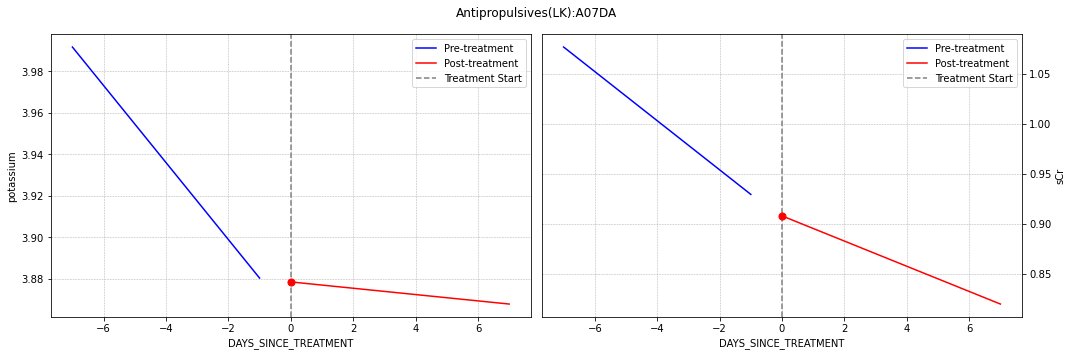

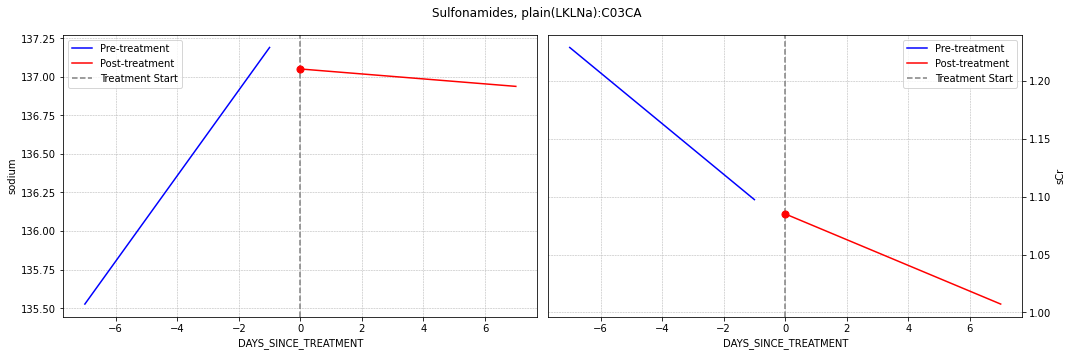

not working for site: LG6657-3 MED:ATC:C03CB Error: ('MED:ATC:C03CB', 'LG11363-5')
not working for site: LG6657-3 MED:ATC:C03EB Error: ('MED:ATC:C03EB', 'LG11363-5')


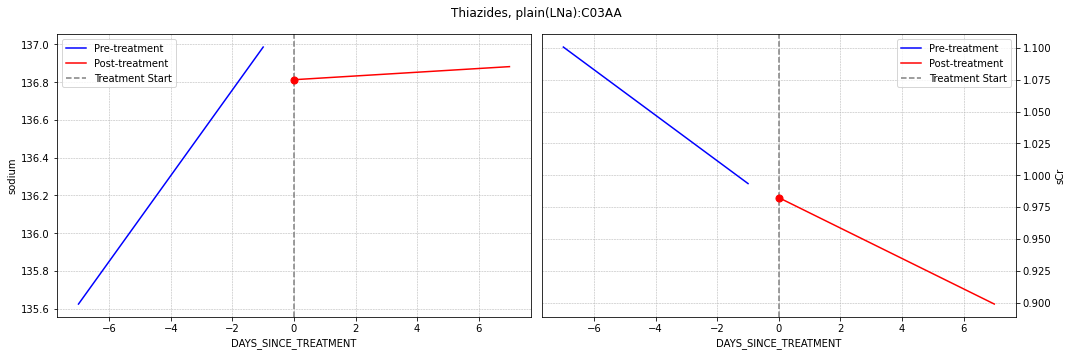

not working for site: LG6657-3 MED:ATC:C03AB Error: ('MED:ATC:C03AB', 'LG11363-5')
not working for site: LG6657-3 MED:ATC:C03AH Error: ('MED:ATC:C03AH', 'LG11363-5')


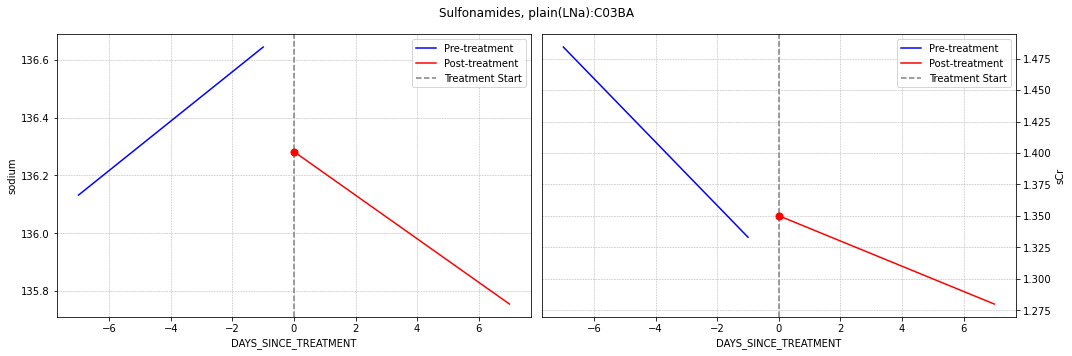

not working for site: LG6657-3 MED:ATC:C03EA Error: ('MED:ATC:C03EA', 'LG11363-5')


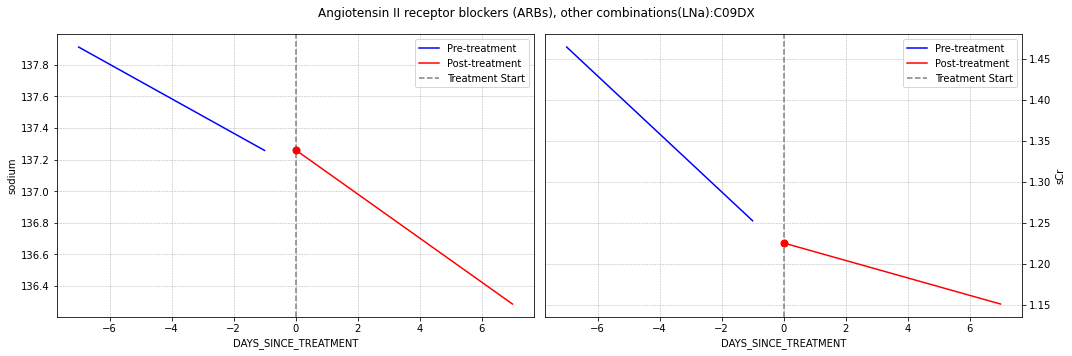

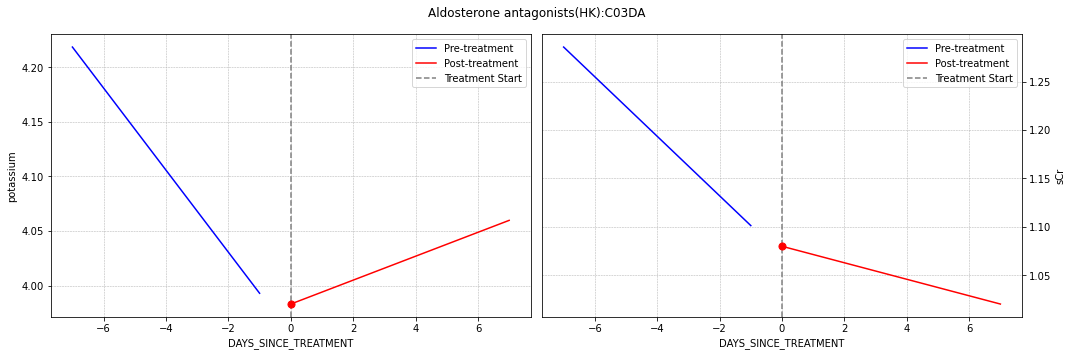

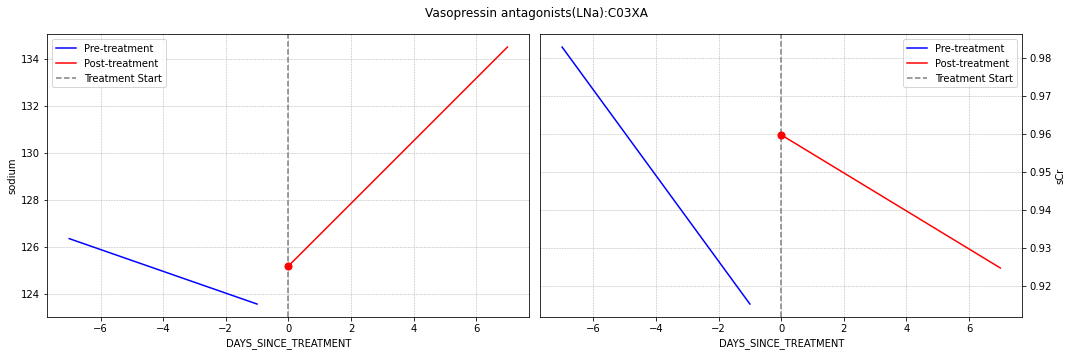

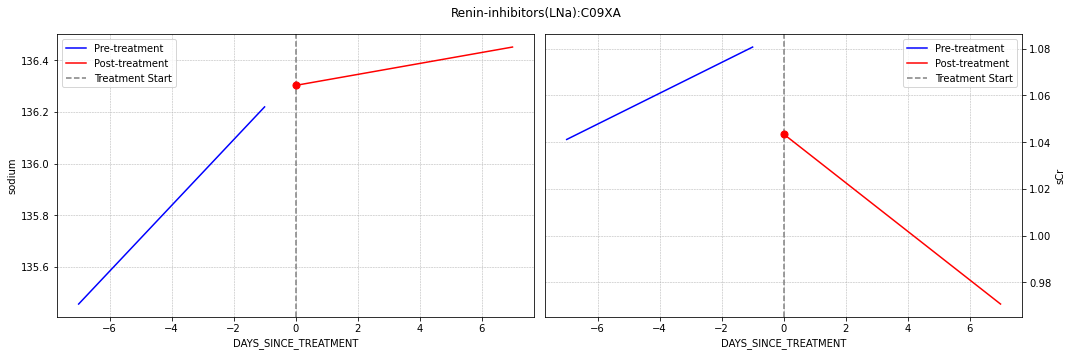

not working for site: LG6657-3 MED:ATC:C03AX Error: ('MED:ATC:C03AX', 'LG11363-5')
not working for site: LG6657-3 MED:ATC:C09BX Error: ('MED:ATC:C09BX', 'LG11363-5')


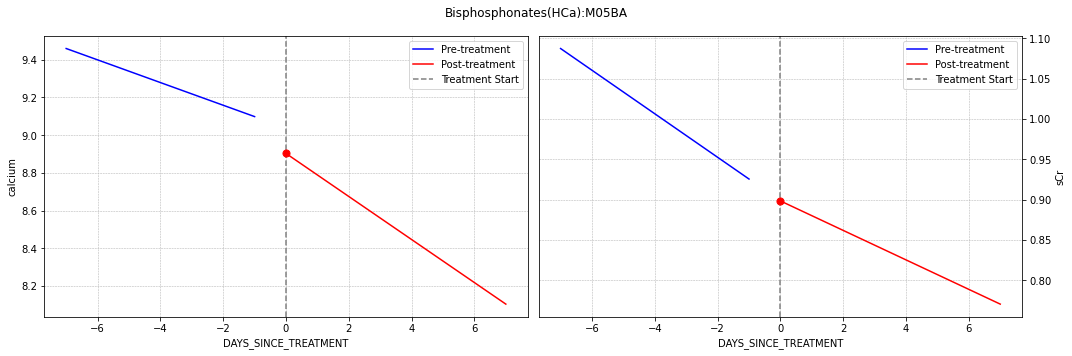

not working for site: LG6657-3 MED:ATC:M05BB Error: ('MED:ATC:M05BB', 'LG49864-8')


In [9]:
#med = 'MED:ATC:A07DA'
for med in list(dict_med.keys()):
    try:
        if 'K)'in dict_med[med]:
#            lab_loinc_me = ['2823-3', '2160-0']
            lab_loinc_me = ['LG49936-4', 'LG6657-3']
        if 'Na)'in dict_med[med]:
#            lab_loinc_me = ['2951-2', '2160-0']
            lab_loinc_me = ['LG11363-5', 'LG6657-3']
        if 'Ca)'in dict_med[med]:
#            lab_loinc_me = ['17861-6', '2160-0']     
            lab_loinc_me = ['LG49864-8', 'LG6657-3']            
        dataframes = [nhanes2d[(med, loinc)] for loinc in lab_loinc_me]
        plot_its_base(dataframes, lab_loinc, dict_med)
    except Exception as e: 
        print('not working for site:', loinc, med, 'Error:', e)  

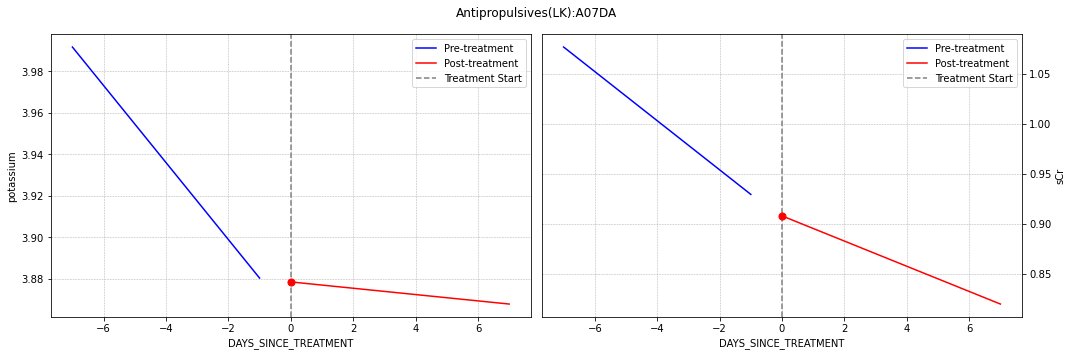

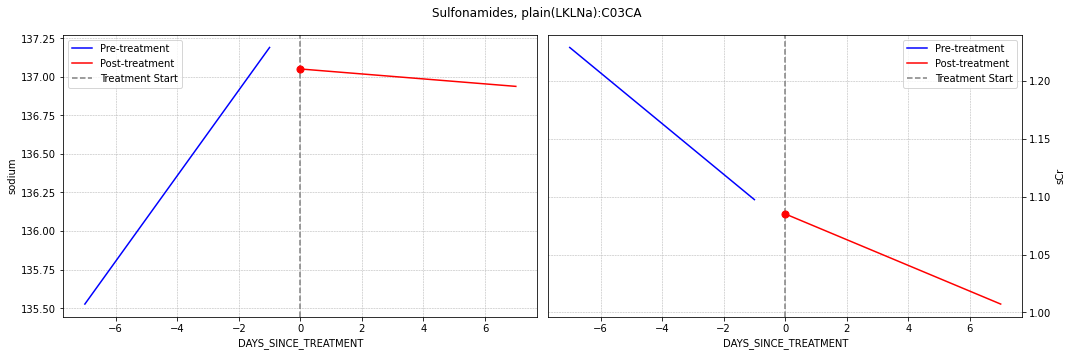

not working for site: LG6657-3 MED:ATC:C03CB Error: ('MED:ATC:C03CB', 'LG11363-5')
not working for site: LG6657-3 MED:ATC:C03EB Error: ('MED:ATC:C03EB', 'LG11363-5')


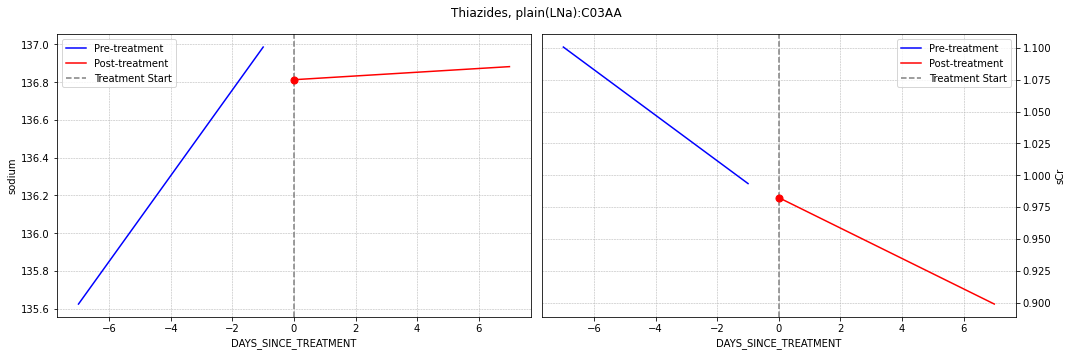

not working for site: LG6657-3 MED:ATC:C03AB Error: ('MED:ATC:C03AB', 'LG11363-5')
not working for site: LG6657-3 MED:ATC:C03AH Error: ('MED:ATC:C03AH', 'LG11363-5')


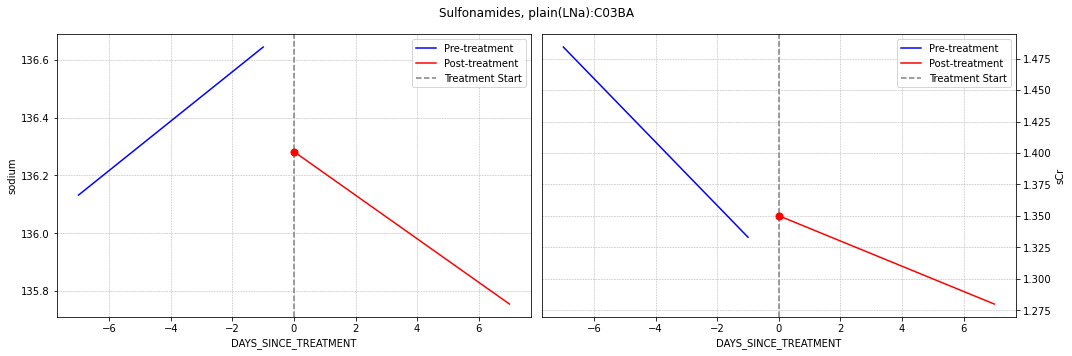

not working for site: LG6657-3 MED:ATC:C03EA Error: ('MED:ATC:C03EA', 'LG11363-5')


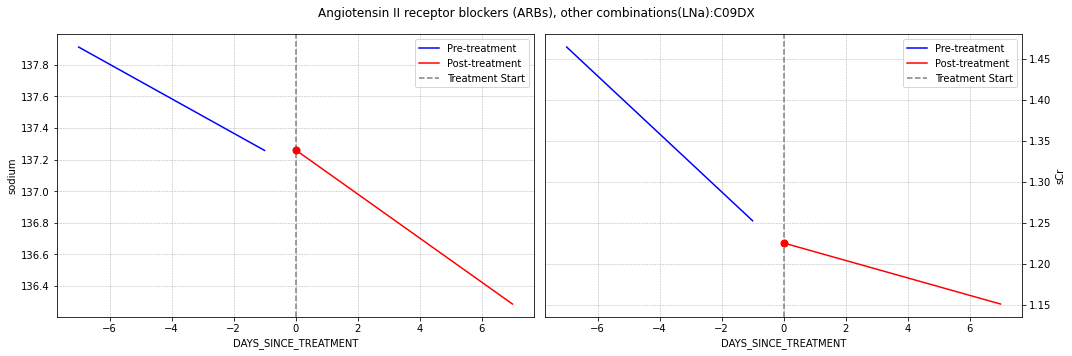

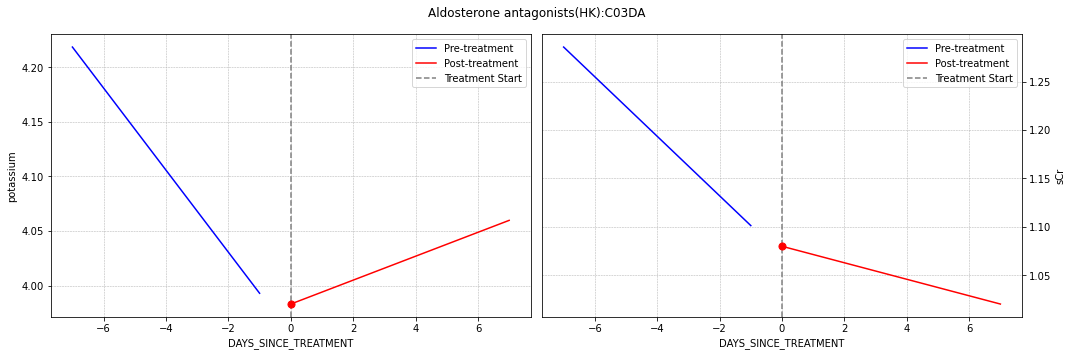

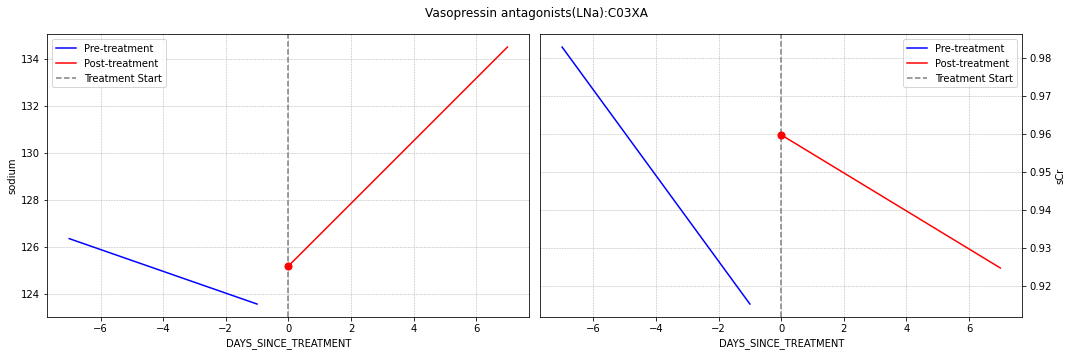

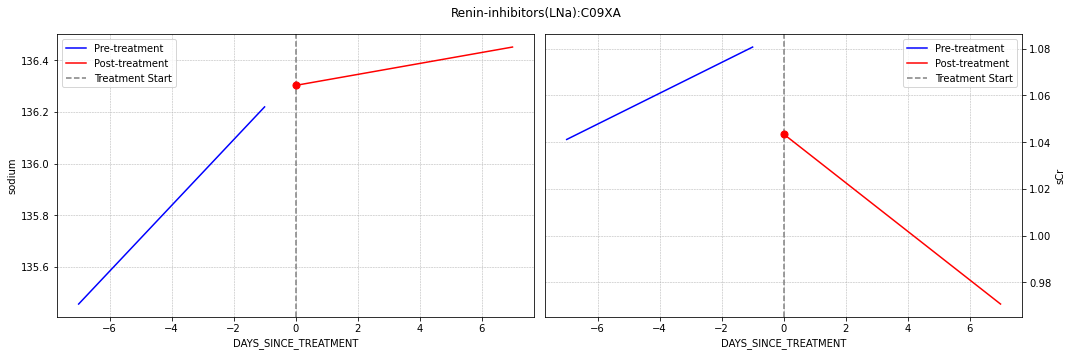

not working for site: LG6657-3 MED:ATC:C03AX Error: ('MED:ATC:C03AX', 'LG11363-5')
not working for site: LG6657-3 MED:ATC:C09BX Error: ('MED:ATC:C09BX', 'LG11363-5')


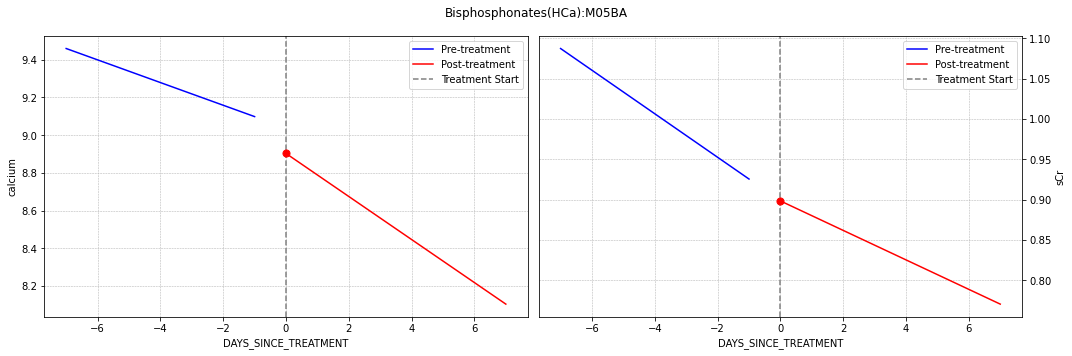

not working for site: LG6657-3 MED:ATC:M05BB Error: ('MED:ATC:M05BB', 'LG49864-8')


In [10]:
#med = 'MED:ATC:A07DA'
for med in list(dict_med.keys()):
    try:
        if 'K)'in dict_med[med]:
#            lab_loinc_me = ['2823-3', '2160-0']
            lab_loinc_me = ['LG49936-4', 'LG6657-3']
        if 'Na)'in dict_med[med]:
#            lab_loinc_me = ['2951-2', '2160-0']
            lab_loinc_me = ['LG11363-5', 'LG6657-3']
        if 'Ca)'in dict_med[med]:
#            lab_loinc_me = ['17861-6', '2160-0']     
            lab_loinc_me = ['LG49864-8', 'LG6657-3']           
        dataframes = [nhanes2d[(med, loinc)] for loinc in lab_loinc_me]
        plot_its_base(dataframes, lab_loinc, dict_med)
    except Exception as e: 
        print('not working for site:', loinc, med, 'Error:', e)        

In [11]:
nhanes2a = pd.concat(list(nhanes2d.values()))

In [12]:
nhanes2a

,ID,RESULT_NUM,posttreatment,DAYS_SINCE_ADMIT,site,predict,intercept,interceptp,slope,slopep,interceptconfl,interceptconfh,slopeconfl,slopeconfh,l,m
53,6,3.70,0,-7,UTSW,3.991705,0.016734,9.223404e-08,0.017053,5.444616e-65,0.010594,0.022874,0.01509,0.019015,LG49936-4,MED:ATC:A07DA
57,6,3.90,0,-7,UTSW,3.991705,0.016734,9.223404e-08,0.017053,5.444616e-65,0.010594,0.022874,0.01509,0.019015,LG49936-4,MED:ATC:A07DA
66,6,3.90,0,-7,UTSW,3.991705,0.016734,9.223404e-08,0.017053,5.444616e-65,0.010594,0.022874,0.01509,0.019015,LG49936-4,MED:ATC:A07DA
681,101,4.10,0,-7,UTSW,3.991705,0.016734,9.223404e-08,0.017053,5.444616e-65,0.010594,0.022874,0.01509,0.019015,LG49936-4,MED:ATC:A07DA
918,136,4.00,0,-7,UTSW,3.991705,0.016734,9.223404e-08,0.017053,5.444616e-65,0.010594,0.022874,0.01509,0.019015,LG49936-4,MED:ATC:A07DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50542,7392,0.69,1,7,UPITT,0.770292,-0.000180,9.386655e-01,0.008699,9.094247e-17,-0.004758,0.004398,0.00665,0.010748,LG6657-3,MED:ATC:M05BA
50551,7394,0.60,1,7,UPITT,0.770292,-0.000180,9.386655e-01,0.008699,9.094247e-17,-0.004758,0.004398,0.00665,0.010748,LG6657-3,MED:ATC:M05BA
50581,7400,1.22,1,7,UPITT,0.770292,-0.000180,9.386655e-01,0.008699,9.094247e-17,-0.004758,0.004398,0.00665,0.010748,LG6657-3,MED:ATC:M05BA
50599,7403,1.64,1,7,UPITT,0.770292,-0.000180,9.386655e-01,0.008699,9.094247e-17,-0.004758,0.004398,0.00665,0.010748,LG6657-3,MED:ATC:M05BA


In [13]:
nhanes2a = nhanes2a[['intercept', 'interceptp', 'slope', 'slopep',
       'interceptconfl', 'interceptconfh', 'slopeconfl', 'slopeconfh', 'l',
       'm']].drop_duplicates()

In [14]:
def get_loinc_for_med(med):
    if 'K)'in dict_med[med]:
#            return ['2823-3', '2160-0']
       return ['LG49936-4', 'LG6657-3']
    if 'Na)'in dict_med[med]:
#            return ['2951-2', '2160-0']
        return ['LG11363-5', 'LG6657-3']
    if 'Ca)'in dict_med[med]:
#            return ['17861-6', '2160-0']     
        return ['LG49864-8', 'LG6657-3']      
    return []

filtered_nhanes2a = nhanes2a.loc[nhanes2a.apply(lambda row: row['l'] in get_loinc_for_med(row['m']), axis=1)]

In [15]:
filtered_nhanes2a

,intercept,interceptp,slope,slopep,interceptconfl,interceptconfh,slopeconfl,slopeconfh,l,m
53,0.016734,9.223404e-08,0.017053,5.444616e-65,0.010594,0.022874,0.015090,0.019015,LG49936-4,MED:ATC:A07DA
4,0.027702,1.895020e-17,0.048515,4.454443e-217,0.021315,0.034089,0.045497,0.051533,LG49936-4,MED:ATC:C03DA
63,-0.135360,4.634950e-25,-0.053991,3.490323e-20,-0.161000,-0.109720,-0.065484,-0.042498,LG49864-8,MED:ATC:M05BA
11,-0.416941,0.000000e+00,-0.293527,0.000000e+00,-0.436182,-0.397699,-0.301820,-0.285234,LG11363-5,MED:ATC:C03CA
81,-0.399986,4.065415e-84,-0.217066,6.569200e-98,-0.440313,-0.359659,-0.237313,-0.196819,LG11363-5,MED:ATC:C03AA
82,-0.447300,1.714150e-46,-0.160694,1.956588e-32,-0.508501,-0.386098,-0.187243,-0.134145,LG11363-5,MED:ATC:C03BA
273,0.112589,2.423088e-01,-0.030343,5.272982e-01,-0.076134,0.301311,-0.124420,0.063733,LG11363-5,MED:ATC:C09DX
26,2.080392,3.255175e-33,1.796987,1.514123e-144,1.742783,2.418002,1.662972,1.931003,LG11363-5,MED:ATC:C03XA
144,-0.043897,8.971092e-01,-0.105838,6.577716e-01,-0.709015,0.621220,-0.573614,0.361939,LG11363-5,MED:ATC:C09XA
54,0.003060,1.737180e-03,0.011941,4.766950e-286,0.001145,0.004976,0.011294,0.012588,LG6657-3,MED:ATC:A07DA


In [16]:
order = {'LG6657-3': 1}
filtered_nhanes2a['sort_order'] = filtered_nhanes2a['l'].map(order).fillna(0)

In [17]:
filtered_nhanes2a['m'] = filtered_nhanes2a['m'].map(dict_med).fillna(filtered_nhanes2a['m'])

# Replace LOINC code in the 'l' column with its respective name from lab_loinc
filtered_nhanes2a['l'] = filtered_nhanes2a['l'].map(lab_loinc).fillna(filtered_nhanes2a['l'])

# Sorting to ensure that 'sCr' (which corresponds to '2160-0') is at the bottom of each group
filtered_nhanes2a=filtered_nhanes2a.sort_values('sort_order')

In [135]:
# Prepare data for slope forest plot
df_slope = filtered_nhanes2a[['l', 'm', 'slope', 'slopeconfl', 'slopeconfh', 'slopep']]
df_slope.columns = ['label', 'group', 'r', 'll', 'hl', 'p-val']

# Prepare data for intercept forest plot
df_intercept = filtered_nhanes2a[['l', 'm', 'intercept', 'interceptconfl', 'interceptconfh', 'interceptp']]
df_intercept.columns = ['label', 'group', 'r', 'll', 'hl', 'p-val']

In [228]:
df_slope = df_slope.sort_values('group', ascending=False)
df_slope['p-val'] = df_slope['p-val'].round(2)

In [229]:
df_slope['formatted_p-val'] = df_slope['p-val'].apply(lambda x: f'{x:.2f}')

In [297]:
gg = list(df_slope['group'].unique())
df_slope1 = df_slope[df_slope['group'].isin(gg[1:5]+gg[7:10])]

In [368]:
df_slope = df_slope.replace(
    'Angiotensin II receptor blockers (ARBs), other combinations(LNa):C09DX',
    'Angiotensin II receptor blockers (ARBs)(LNa):C09DX'
)

In [370]:
df_slope.to_parquet('forestplot.parquet')

In [369]:
df_slope

,label,group,r,ll,hl,p-val,formatted_p-val
15,sCr,Vasopressin antagonists(LNa):C03XA,0.006270,0.001279,0.011262,0.01,0.01
26,sodium,Vasopressin antagonists(LNa):C03XA,1.796987,1.662972,1.931003,0.00,0.00
74,sCr,"Thiazides, plain(LNa):C03AA",0.005939,0.002706,0.009172,0.00,0.00
81,sodium,"Thiazides, plain(LNa):C03AA",-0.217066,-0.237313,-0.196819,0.00,0.00
82,sodium,"Sulfonamides, plain(LNa):C03BA",-0.160694,-0.187243,-0.134145,0.00,0.00
71,sCr,"Sulfonamides, plain(LNa):C03BA",0.015179,0.013179,0.017179,0.00,0.00
18,sCr,"Sulfonamides, plain(LKLNa):C03CA",0.010777,0.010041,0.011513,0.00,0.00
11,sodium,"Sulfonamides, plain(LKLNa):C03CA",-0.293527,-0.301820,-0.285234,0.00,0.00
137,sCr,Renin-inhibitors(LNa):C09XA,-0.016986,-0.042655,0.008684,0.20,0.20
144,sodium,Renin-inhibitors(LNa):C09XA,-0.105838,-0.573614,0.361939,0.66,0.66


In [212]:
# df_slope2 = df_slope[df_slope['group'].isin(gg[5:7])]

# def custom_sort_key(x):
#     return (x == 'sCr', x)

# # Sort the DataFrame with 'sCr' coming last
# df_slope1 = df_slope1.sort_values(by='label', key=lambda col: col.map(custom_sort_key)).reset_index(drop=True)
# df_slope2 = df_slope2.sort_values(by='label', key=lambda col: col.map(custom_sort_key)).reset_index(drop=True)

# df_slope3 = df_slope3.sort_values(by='group')

# # Create the data for the table
# data = {
#     "label": ["sCr", "calcium", "sCr", "potassium"],
#     "group": [
#         "A",
#         "A",
#         "C",
#         "C",
#     ],
#     "r": [0.013939, -0.05, 0.01, 0.02],
#     "ll": [0.002706, -0.08, 0.00, 0.01],
#     "hl": [0.015, -0.01, 0.02, 0.03],
#     "p-val": [0.0, 0.0, 0.0, 0.0],
#     "formatted_p-val": ["0.00", "0.00", "0.00", "0.00"],
# }

# # Create the DataFrame
# df = pd.DataFrame(data)

# # Set the index to match the provided table
# df.index = [0,1,2,3]

# # Creating the forest plots
# # For intercept
# fp.forestplot(df,
#               figsize = (6, 6),
#               estimate="r",  
#               ll="ll", hl="hl",  
#               varlabel="label",  
#               capitalize=True,  # Capitalize labels
#               groupvar="group",  # Add variable groupings 
# #              pval="p-val",  # Column of p-value to be reported on right
#               color_alt_rows=True,  # Gray alternate rows
# #              annote=[],
# #              annoteheaders=[],
#               annote=["est_ci"],  # columns to report on left of plot
#               annoteheaders=["Est. (95% Conf. Int.)"],  # ^corresponding headers
#               rightannote=["formatted_p-val"],  # columns to report on right of plot
#               right_annoteheaders=["P-value"],  # ^corresponding headers              
#               xlabel="Slope",  # x-label title
#               table=True,
#               **{"ylabel_size": 20,
#                  "xtick_size": 12,}
# #                 "offset": 1,}  # control size of printed ylabel
#               )
# plt.savefig("intercept_forest1.svg", bbox_inches="tight")

# df

# fp.forestplot(df_slope2,
#               figsize = (5, 2),
#               table=True,
#               estimate="r",  
#               ll="ll", hl="hl",  
#               varlabel="label",  
#               capitalize=True,  # Capitalize labels
#               groupvar="group",  # Add variable groupings 
# #              pval="p-val",  # Column of p-value to be reported on right
#               color_alt_rows=True,  # Gray alternate rows
# #              annote=[],
# #              annoteheaders=[],
#               annote=["est_ci"],  # columns to report on left of plot
#               annoteheaders=["Est. (95% Conf. Int.)"],  # ^corresponding headers
#               rightannote=["formatted_p-val"],  # columns to report on right of plot
#               right_annoteheaders=["P-value"],  # ^corresponding headers              
#               xlabel="Slope",  # x-label title
#               **{"ylabel_size": 20,
#                  "xtick_size": 12,}
# #                 "offset": 1,}  # control size of printed ylabel
#               )
# plt.savefig("intercept_forest2.svg", bbox_inches="tight")